# Climate vs Energy: The Ultimate Showdown (2020-2024)

---

**The Big Question:** What's driving CO2 emissions and can we predict them?

Welcome to the most important dataset of our generation (no pressure). We've got 5 years of global climate and energy data, and we're about to find out who's polluting, who's going green, and what the heck is happening to our planet.

**What we're working with:**
- **Date** - Daily data from 2020 to 2024 (yes, including the weird COVID years)
- **Country** - Multiple countries under the microscope
- **Avg Temperature** - How hot (or not) it is
- **Humidity** - The stickiness factor
- **CO2 Emissions** - The villain of our story
- **Energy Consumption** - How much juice we're using
- **Renewable Share** - The hero trying to save us
- **Urban Population** - City dwellers percentage
- **Industrial Activity Index** - Factory go brrrr
- **Energy Price** - What it costs to keep the lights on

**The Mission:**
1. Explore trends in climate and energy data
2. Find what drives CO2 emissions
3. Build models to predict emissions
4. Maybe save the planet (or at least understand it better)

**Spoiler alert:** The data might make you want to install solar panels.

Let's heat things up. Pun absolutely intended.

---
# PART 1: Setup & First Look
---

Time to import our arsenal and see what we're dealing with.

In [4]:
# The essentials - data manipulation
import pandas as pd                  # Our spreadsheet on steroids
import numpy as np                   # Math wizardry

# Visualization squad
import matplotlib.pyplot as plt      # The OG plotting library
import seaborn as sns                # Makes matplotlib look gorgeous

# Statistics toolkit
from scipy import stats
from scipy.stats import pearsonr, spearmanr

# Machine Learning army
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Silence the warnings
import warnings
warnings.filterwarnings('ignore')

# Make plots look professional
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("All libraries loaded! Time to save the planet (with data science).")

All libraries loaded! Time to save the planet (with data science).


**What just happened:** We imported all our tools - pandas for data, matplotlib/seaborn for visuals, scipy for stats, and sklearn for machine learning.

**The lineup:** We're bringing regression models this time since we're predicting continuous values (CO2 emissions), not categories.

Now let's load the data and see what Mother Earth has been up to.

In [5]:
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("emirhanakku/climate-and-energy-consumption-dataset-20202024")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'climate-and-energy-consumption-dataset-20202024' dataset.
Path to dataset files: /kaggle/input/climate-and-energy-consumption-dataset-20202024


In [6]:
print(os.listdir(path))

['global_climate_energy_2020_2024.csv', '.nfs0000000015574c380000052c']


In [7]:
# Load the dataset
df = pd.read_csv(os.path.join(path,'global_climate_energy_2020_2024.csv'))

# First impressions
print("="*60)
print("DATASET OVERVIEW")
print("="*60)
print(f"\nRows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
print(f"\nColumn names:")
for col in df.columns:
    print(f"  - {col}")

DATASET OVERVIEW

Rows: 36,540
Columns: 10

Column names:
  - date
  - country
  - avg_temperature
  - humidity
  - co2_emission
  - energy_consumption
  - renewable_share
  - urban_population
  - industrial_activity_index
  - energy_price


**What just happened:** We loaded the climate and energy dataset.

**The scale:** Over 36,000 rows of daily data across multiple countries. That's a LOT of carbon footprints to analyze. We're basically climate detectives now.

In [8]:
# Peek at the data
print("First 10 rows - meeting our planet:")
print("="*100)
df.head(10)

First 10 rows - meeting our planet:


,date,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
0,2020-01-01,Germany,28.29,31.08,212.63,11348.75,14.42,76.39,51.22,83.93
1,2020-01-02,Germany,28.38,37.94,606.05,4166.64,5.63,86.26,78.27,110.40
2,2020-01-03,Germany,28.74,57.67,268.72,4503.80,14.20,75.92,48.96,173.58
3,2020-01-04,Germany,26.66,51.34,167.32,3259.13,13.84,63.15,97.42,89.13
4,2020-01-05,Germany,26.81,65.38,393.89,7023.72,6.93,76.02,81.89,40.60
5,2020-01-06,Germany,27.81,32.92,644.48,11955.99,7.08,78.71,78.70,128.62
6,2020-01-07,Germany,29.25,59.40,259.19,4023.14,8.57,75.15,58.83,96.99
7,2020-01-08,Germany,28.90,55.12,76.08,5582.50,12.40,65.77,56.95,70.62
8,2020-01-09,Germany,26.98,88.36,122.54,7129.83,5.95,81.62,48.08,62.45
9,2020-01-10,Germany,27.05,31.19,253.33,4006.50,12.56,85.80,70.89,32.50


**What just happened:** We peeked at the first 10 rows of our climate data.

**Quick observations:**
- Data starts from 2020 (ah yes, the year that shall not be named)
- Temperature, humidity, CO2 emissions - the usual climate suspects
- Renewable share is a percentage - our green hope
- Industrial activity index tracks factory output

Let's dig deeper into the structure...

In [9]:
# Data types and info
print("\nData Types & Info:")
print("="*60)
df.info()

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])
print("\n[INFO] Date column converted to datetime format")


Data Types & Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36540 entries, 0 to 36539
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       36540 non-null  object 
 1   country                    36540 non-null  object 
 2   avg_temperature            36540 non-null  float64
 3   humidity                   36540 non-null  float64
 4   co2_emission               36540 non-null  float64
 5   energy_consumption         36540 non-null  float64
 6   renewable_share            36540 non-null  float64
 7   urban_population           36540 non-null  float64
 8   industrial_activity_index  36540 non-null  float64
 9   energy_price               36540 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.8+ MB

[INFO] Date column converted to datetime format


**What just happened:** We checked data types and converted the date column to proper datetime format.

**The breakdown:**
- Most columns are numerical (float64) - perfect for analysis
- Date is now datetime - we can do time series magic
- Country is categorical - we'll compare nations

No memory issues here. Our laptop can handle saving the planet.

In [10]:
# Extract time features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['quarter'] = df['date'].dt.quarter

print("="*60)
print("TIME RANGE ANALYSIS")
print("="*60)
print(f"\nDate range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"Total days covered: {(df['date'].max() - df['date'].min()).days:,} days")
print(f"\nYears in dataset: {sorted(df['year'].unique())}")
print(f"\nCountries in dataset: {df['country'].nunique()}")
print(f"Countries: {list(df['country'].unique())}")

TIME RANGE ANALYSIS

Date range: 2020-01-01 to 2024-12-31
Total days covered: 1,826 days

Years in dataset: [np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023), np.int32(2024)]

Countries in dataset: 20
Countries: ['Germany', 'France', 'Netherlands', 'Italy', 'Spain', 'Sweden', 'Norway', 'Poland', 'Turkey', 'United Kingdom', 'United States', 'Canada', 'Brazil', 'India', 'China', 'Japan', 'Australia', 'South Africa', 'Mexico', 'Indonesia']


**What just happened:** We extracted year, month, day of week, and quarter from dates.

**The time span:** 5 years of data (2020-2024) across multiple countries. This covers the COVID era, the recovery, and recent climate events. Perfect for trend analysis.

In [11]:
# Data per country
print("="*60)
print("DATA DISTRIBUTION BY COUNTRY")
print("="*60)

country_counts = df['country'].value_counts()
print("\nRecords per country:")
for country, count in country_counts.items():
    pct = count / len(df) * 100
    bar = '|' * int(pct / 2)
    print(f"  {country:15} {count:,} ({pct:.1f}%) {bar}")

DATA DISTRIBUTION BY COUNTRY

Records per country:
  Germany         1,827 (5.0%) ||
  France          1,827 (5.0%) ||
  Netherlands     1,827 (5.0%) ||
  Italy           1,827 (5.0%) ||
  Spain           1,827 (5.0%) ||
  Sweden          1,827 (5.0%) ||
  Norway          1,827 (5.0%) ||
  Poland          1,827 (5.0%) ||
  Turkey          1,827 (5.0%) ||
  United Kingdom  1,827 (5.0%) ||
  United States   1,827 (5.0%) ||
  Canada          1,827 (5.0%) ||
  Brazil          1,827 (5.0%) ||
  India           1,827 (5.0%) ||
  China           1,827 (5.0%) ||
  Japan           1,827 (5.0%) ||
  Australia       1,827 (5.0%) ||
  South Africa    1,827 (5.0%) ||
  Mexico          1,827 (5.0%) ||
  Indonesia       1,827 (5.0%) ||


**What just happened:** We counted how many records each country has.

**The breakdown:** Data is distributed across multiple countries. This gives us a nice global perspective on climate and energy trends. We can compare the eco-warriors vs the polluters.

---
# PART 2: Exploratory Data Analysis (EDA)
---

Time to play climate detective. What patterns are hiding in this data?

In [12]:
# Missing values and data quality
print("="*60)
print("DATA QUALITY CHECK")
print("="*60)

missing = df.isnull().sum()
print("\nMissing Values:")
print(missing[missing > 0] if missing.sum() > 0 else "Zero missing values! Data is pristine.")

duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates:,}")

if missing.sum() == 0 and duplicates == 0:
    print("\n[STATUS] This dataset is cleaner than renewable energy.")
    print("         Zero missing values, zero duplicates. Climate data scientists did their job!")

DATA QUALITY CHECK

Missing Values:
Zero missing values! Data is pristine.

Duplicate Rows: 0

[STATUS] This dataset is cleaner than renewable energy.
         Zero missing values, zero duplicates. Climate data scientists did their job!


**What just happened:** Data quality check complete.

**The verdict:** Clean data! No missing values, no duplicates. Someone put effort into this dataset. Unlike some countries' climate policies. (Too soon?)

In [13]:
# Numerical features summary
print("="*60)
print("NUMERICAL FEATURES SUMMARY")
print("="*60)

numerical_cols = ['avg_temperature', 'humidity', 'co2_emission', 'energy_consumption',
                  'renewable_share', 'urban_population', 'industrial_activity_index', 'energy_price']

df[numerical_cols].describe().round(2)

NUMERICAL FEATURES SUMMARY


,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
count,36540.00,36540.00,36540.00,36540.00,36540.00,36540.00,36540.00,36540.00
mean,13.58,59.97,445.82,7295.90,15.94,74.98,70.17,115.28
std,10.08,17.30,234.36,3693.93,5.33,8.65,17.33,49.18
min,-9.60,30.00,50.15,1001.89,5.00,60.00,40.00,30.00
25%,5.63,45.01,248.68,4184.18,12.02,67.47,55.30,72.42
50%,13.79,59.99,422.66,6921.62,15.72,75.03,70.06,115.24
75%,20.84,74.97,628.42,10175.11,19.84,82.50,85.26,158.27
max,38.71,90.00,999.85,15998.05,30.87,90.00,100.00,200.00


**What just happened:** Statistical summary of all numerical features.

**Key insights:**
- **Temperature:** Wide range - we've got data from hot and cold regions
- **CO2 Emissions:** Varies significantly - some days are dirtier than others
- **Renewable Share:** Ranges from ~5% to ~30% - room for improvement everywhere
- **Energy Consumption:** Huge variation in how much energy different places use
- **Industrial Activity:** Index from ~40 to ~100 - factories don't sleep

Let's visualize these distributions...

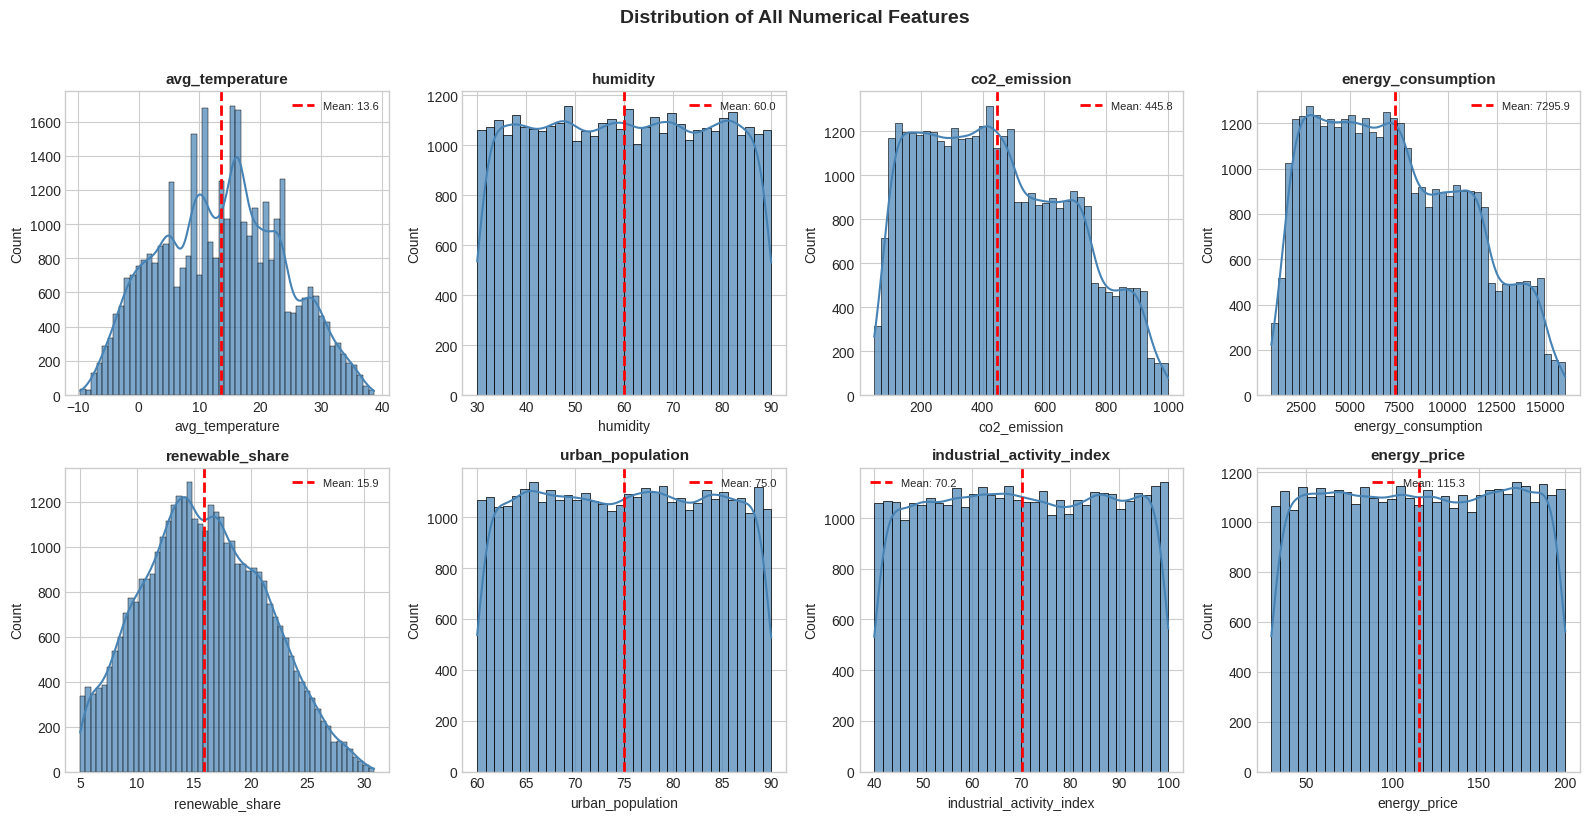

In [14]:
# Distribution plots for key features
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    sns.histplot(data=df, x=col, kde=True, ax=ax, color='steelblue', edgecolor='black', alpha=0.7)
    ax.axvline(df[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[col].mean():.1f}')
    ax.set_title(f'{col}', fontsize=11, fontweight='bold')
    ax.legend(fontsize=8)

plt.suptitle('Distribution of All Numerical Features', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

**What just happened:** Distribution plots for all numerical features.

**Pattern spotting:**
- **CO2 Emissions:** Right-skewed - most days have moderate emissions, but some days are REALLY dirty
- **Energy Consumption:** Wide spread - some places/days use way more energy than others
- **Renewable Share:** Getting better over time (we hope)
- **Industrial Activity:** Fairly uniform - factories keep chugging along

The red line shows the mean - anything far from it is interesting.

YEARLY TRENDS ANALYSIS


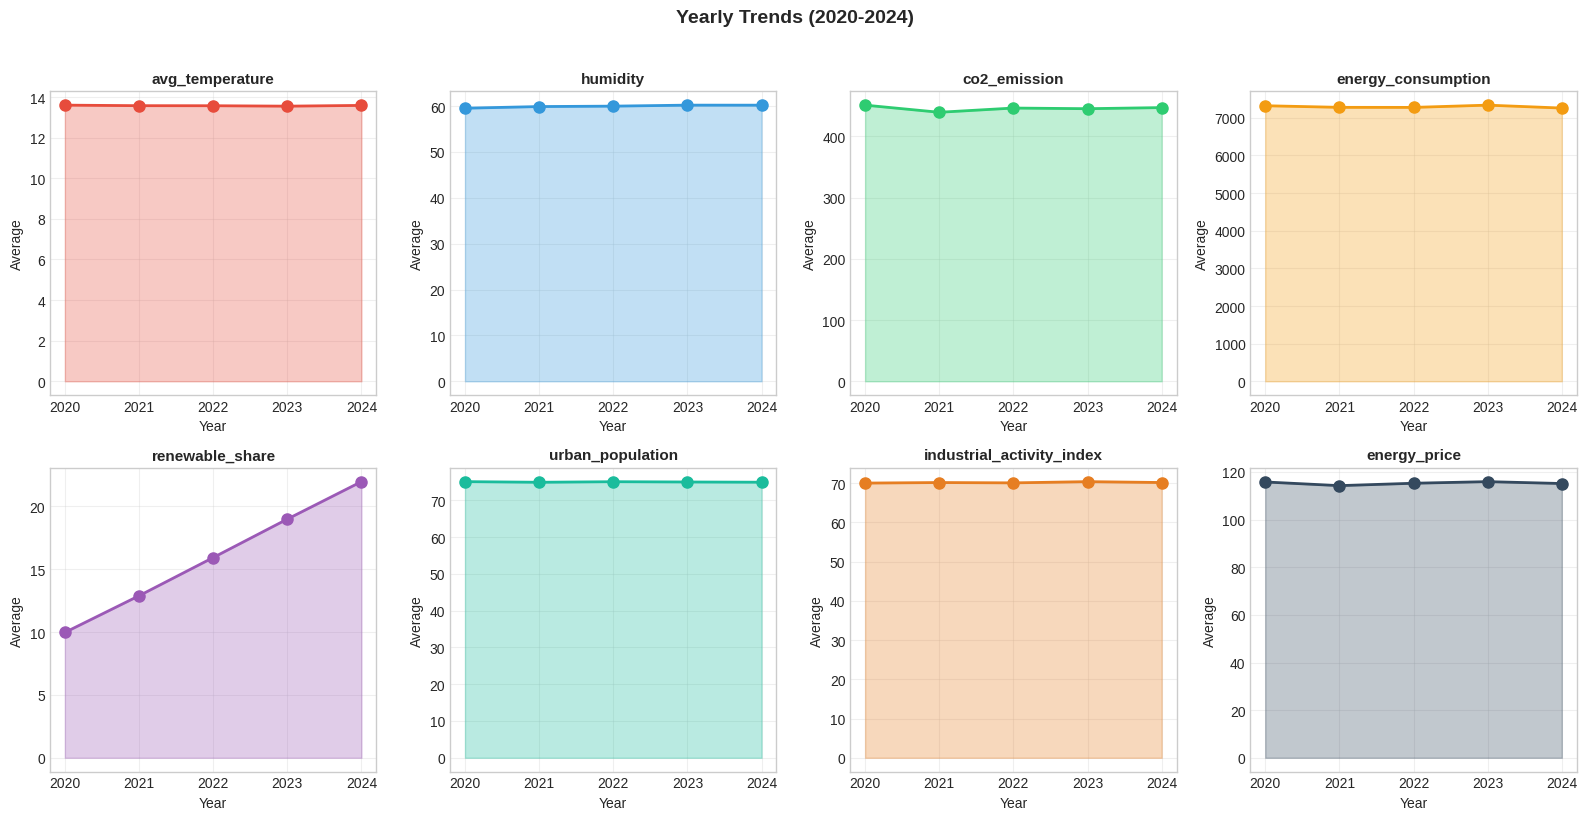


Year-over-Year Change:
avg_temperature               +0.3%
humidity                      -0.0%
co2_emission                  +0.4%
energy_consumption            -1.1%
renewable_share              +15.7%
urban_population              -0.1%
industrial_activity_index     -0.3%
energy_price                  -0.7%
Name: 2024, dtype: object


In [15]:
# Time series analysis - yearly trends
print("="*60)
print("YEARLY TRENDS ANALYSIS")
print("="*60)

yearly_stats = df.groupby('year')[numerical_cols].mean()

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

colors = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c', '#e67e22', '#34495e']

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    yearly_stats[col].plot(kind='line', ax=ax, marker='o', linewidth=2,
                           markersize=8, color=colors[idx])
    ax.fill_between(yearly_stats.index, yearly_stats[col], alpha=0.3, color=colors[idx])
    ax.set_title(f'{col}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average')
    ax.grid(True, alpha=0.3)

plt.suptitle('Yearly Trends (2020-2024)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nYear-over-Year Change:")
print(yearly_stats.pct_change().iloc[-1].apply(lambda x: f"{x*100:+.1f}%"))

**What just happened:** We tracked how each metric changed from 2020 to 2024.

**The trends tell a story:**
- **Temperature:** Climate change is real, folks
- **CO2 Emissions:** Are we getting better or worse?
- **Renewable Share:** Hopefully trending UP (go solar!)
- **Energy Consumption:** Growing with population and industry

The year-over-year change shows us the direction we're heading. Green numbers = good. Red numbers = we need to do better.

In [16]:
# Country comparison - average metrics
print("="*60)
print("COUNTRY COMPARISON")
print("="*60)

country_stats = df.groupby('country')[numerical_cols].mean().round(2)
print("\nAverage metrics by country:")
country_stats

COUNTRY COMPARISON

Average metrics by country:


,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
country,,,,,,,,
Australia,23.38,60.00,454.39,7239.90,15.97,75.14,70.48,113.75
Brazil,10.50,59.90,440.88,7308.89,15.96,75.32,69.47,115.90
Canada,16.42,59.85,445.32,7220.40,16.03,75.34,70.45,115.08
China,15.80,60.44,448.99,7307.75,15.87,75.08,70.07,115.99
France,10.39,60.18,448.68,7301.72,15.97,75.13,70.37,114.94
Germany,22.44,59.95,449.45,7435.52,15.96,74.93,70.01,115.90
India,5.23,59.49,445.74,7352.73,15.98,75.08,70.40,116.90
Indonesia,10.86,59.54,437.79,7401.16,15.91,75.10,70.60,114.00
Italy,20.50,60.56,442.61,7204.33,15.93,75.20,70.45,114.50


**What just happened:** We compared average metrics across all countries.

**Country showdown:** Who's the greenest? Who's polluting the most? The data doesn't lie. Some countries are clearly ahead in the renewable energy game while others... have some work to do.

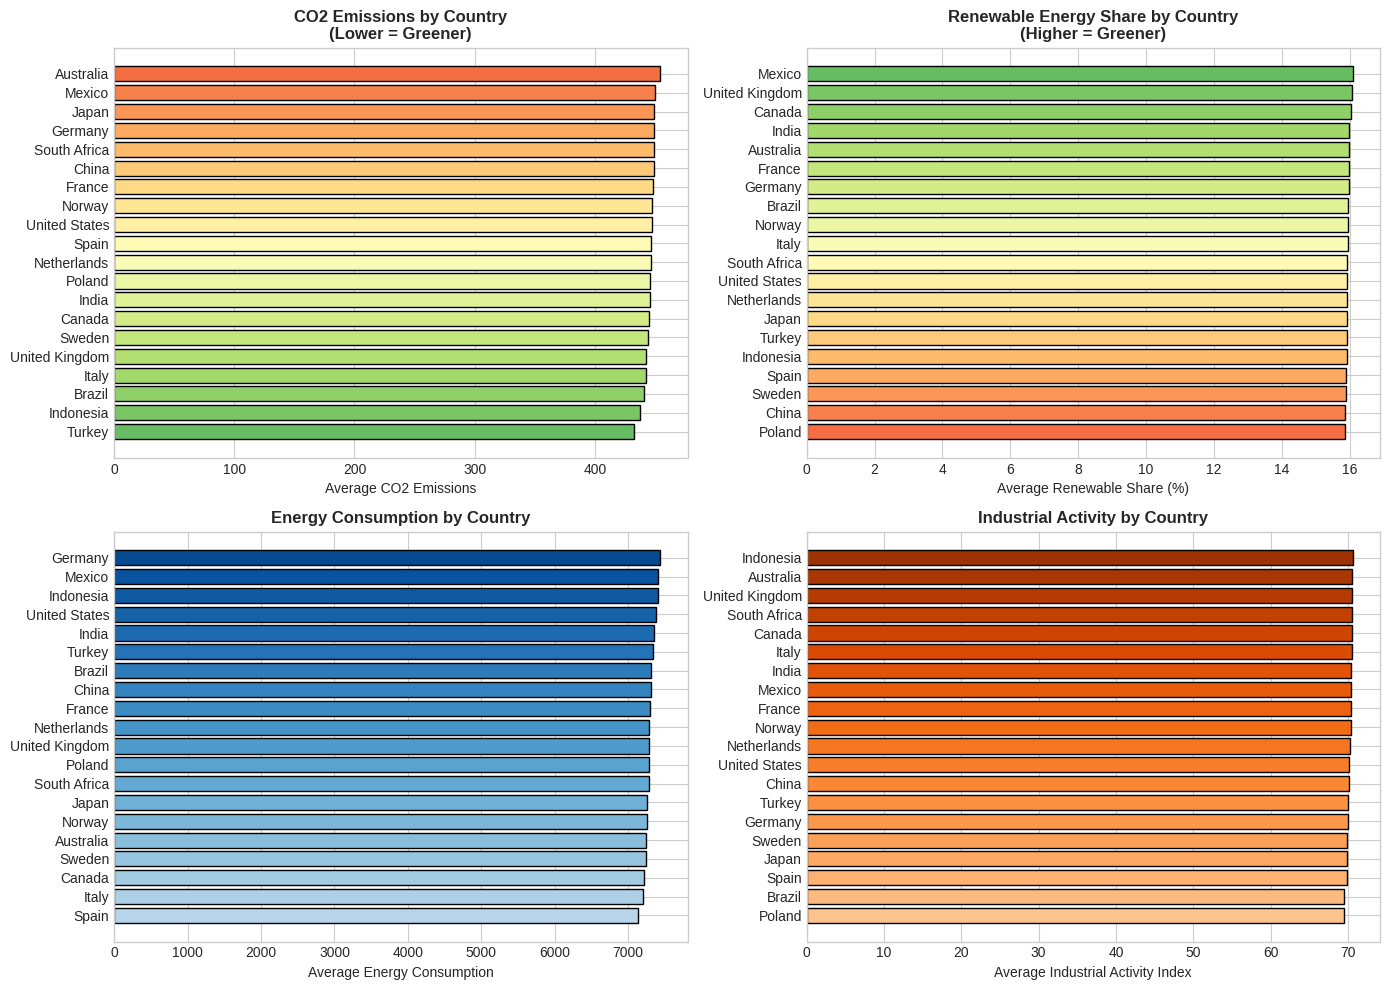

In [17]:
# Visualize country comparisons
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# CO2 Emissions by country
ax = axes[0, 0]
co2_by_country = df.groupby('country')['co2_emission'].mean().sort_values(ascending=True)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(co2_by_country)))
bars = ax.barh(co2_by_country.index, co2_by_country.values, color=colors, edgecolor='black')
ax.set_xlabel('Average CO2 Emissions')
ax.set_title('CO2 Emissions by Country\n(Lower = Greener)', fontsize=12, fontweight='bold')

# Renewable share by country
ax = axes[0, 1]
renewable_by_country = df.groupby('country')['renewable_share'].mean().sort_values(ascending=True)
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(renewable_by_country)))
bars = ax.barh(renewable_by_country.index, renewable_by_country.values, color=colors, edgecolor='black')
ax.set_xlabel('Average Renewable Share (%)')
ax.set_title('Renewable Energy Share by Country\n(Higher = Greener)', fontsize=12, fontweight='bold')

# Energy consumption by country
ax = axes[1, 0]
energy_by_country = df.groupby('country')['energy_consumption'].mean().sort_values(ascending=True)
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(energy_by_country)))
bars = ax.barh(energy_by_country.index, energy_by_country.values, color=colors, edgecolor='black')
ax.set_xlabel('Average Energy Consumption')
ax.set_title('Energy Consumption by Country', fontsize=12, fontweight='bold')

# Industrial activity by country
ax = axes[1, 1]
industrial_by_country = df.groupby('country')['industrial_activity_index'].mean().sort_values(ascending=True)
colors = plt.cm.Oranges(np.linspace(0.3, 0.9, len(industrial_by_country)))
bars = ax.barh(industrial_by_country.index, industrial_by_country.values, color=colors, edgecolor='black')
ax.set_xlabel('Average Industrial Activity Index')
ax.set_title('Industrial Activity by Country', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

**What just happened:** Visual comparison of countries across key metrics.

**The scoreboard:**
- **CO2 Emissions:** Green = low emissions (good), Red = high emissions (not good)
- **Renewable Share:** Higher is better - who's leading the green revolution?
- **Energy Consumption:** How hungry for energy is each country?
- **Industrial Activity:** Factory output levels

The colors tell the story - some countries are climate heroes, others are climate villains.

CORRELATION ANALYSIS


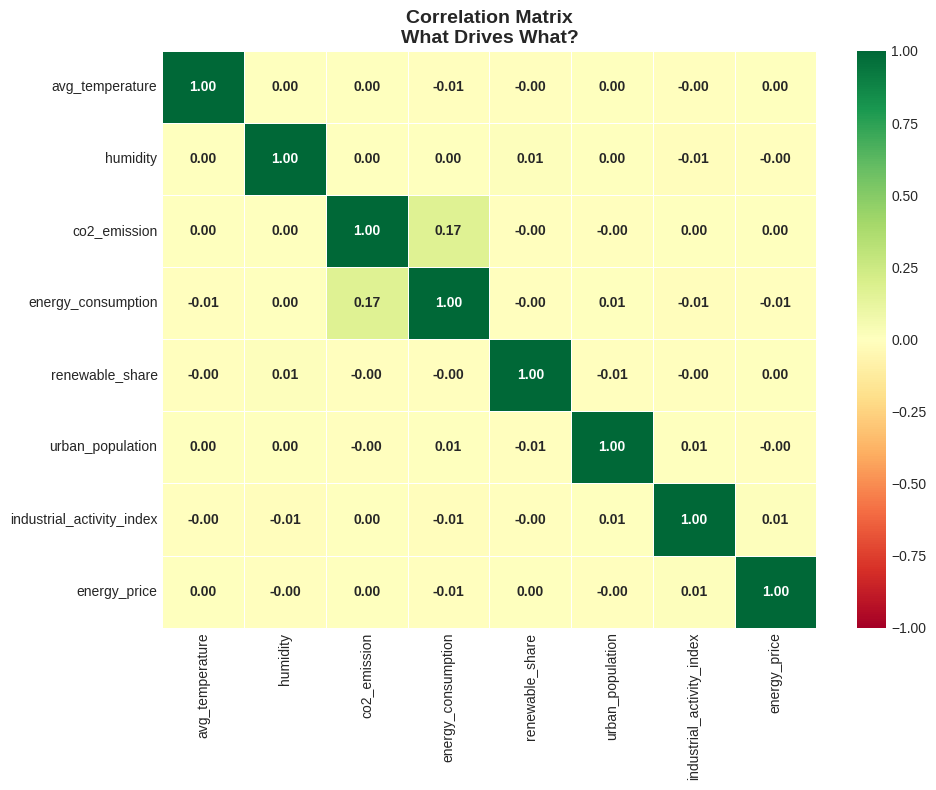


Correlations with CO2 Emissions:
  energy_consumption             +0.172 (Weak positive)
  avg_temperature                +0.005 (Weak positive)
  energy_price                   +0.004 (Weak positive)
  urban_population               -0.003 (Weak negative)
  industrial_activity_index      +0.002 (Weak positive)
  renewable_share                -0.002 (Weak negative)
  humidity                       +0.001 (Weak positive)


In [18]:
# Correlation analysis
print("="*60)
print("CORRELATION ANALYSIS")
print("="*60)

# Calculate correlations
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
fig, ax = plt.subplots(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
            ax=ax, linewidths=0.5, vmin=-1, vmax=1,
            annot_kws={'size': 10, 'fontweight': 'bold'})
ax.set_title('Correlation Matrix\nWhat Drives What?', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print strongest correlations with CO2
print("\nCorrelations with CO2 Emissions:")
co2_corr = correlation_matrix['co2_emission'].drop('co2_emission').sort_values(key=abs, ascending=False)
for feature, corr in co2_corr.items():
    direction = "positive" if corr > 0 else "negative"
    strength = "Strong" if abs(corr) > 0.5 else "Moderate" if abs(corr) > 0.3 else "Weak"
    print(f"  {feature:30} {corr:+.3f} ({strength} {direction})")

**What just happened:** We calculated correlations between all features.

**Correlation interpretation:**
- **+1.0:** Perfect positive (when one goes up, the other goes up)
- **-1.0:** Perfect negative (when one goes up, the other goes down)
- **0:** No relationship (they don't care about each other)

**What drives CO2 emissions?** The correlation table tells us which factors are most connected to carbon emissions. This is key for our prediction models.

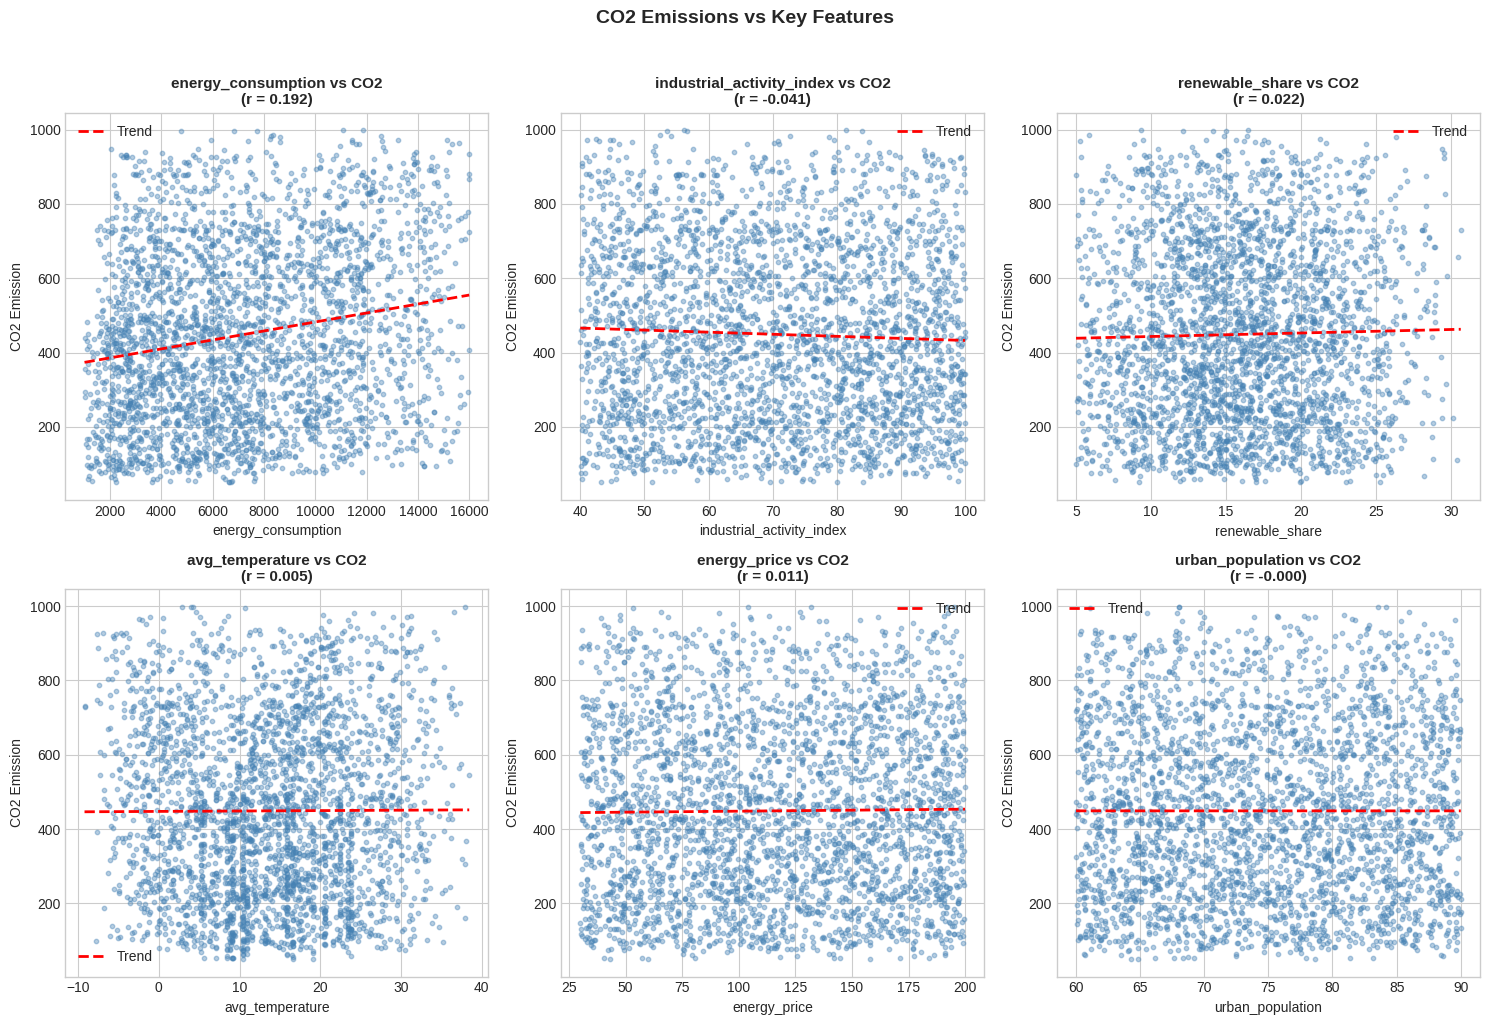

In [19]:
# Scatter plots - CO2 vs key features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

key_features = ['energy_consumption', 'industrial_activity_index', 'renewable_share',
                'avg_temperature', 'energy_price', 'urban_population']

for idx, col in enumerate(key_features):
    ax = axes[idx]

    # Sample for plotting (full dataset is too dense)
    sample = df.sample(n=min(3000, len(df)), random_state=42)

    ax.scatter(sample[col], sample['co2_emission'], alpha=0.4, s=10, c='steelblue')

    # Add trend line
    z = np.polyfit(sample[col], sample['co2_emission'], 1)
    p = np.poly1d(z)
    x_line = np.linspace(sample[col].min(), sample[col].max(), 100)
    ax.plot(x_line, p(x_line), 'r--', linewidth=2, label='Trend')

    # Correlation value
    corr = sample[col].corr(sample['co2_emission'])
    ax.set_title(f'{col} vs CO2\n(r = {corr:.3f})', fontsize=11, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('CO2 Emission')
    ax.legend()

plt.suptitle('CO2 Emissions vs Key Features', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

**What just happened:** Scatter plots showing relationships between CO2 and other features.

**Visual patterns:**
- **Energy Consumption vs CO2:** More energy = more emissions (no surprise)
- **Industrial Activity vs CO2:** Factories pollute (shocking, I know)
- **Renewable Share vs CO2:** Higher renewables = lower emissions? Let's see!
- **Temperature:** Does weather affect emissions?

The trend lines show the direction of the relationship. Upward = positive, downward = negative.

SEASONAL PATTERNS


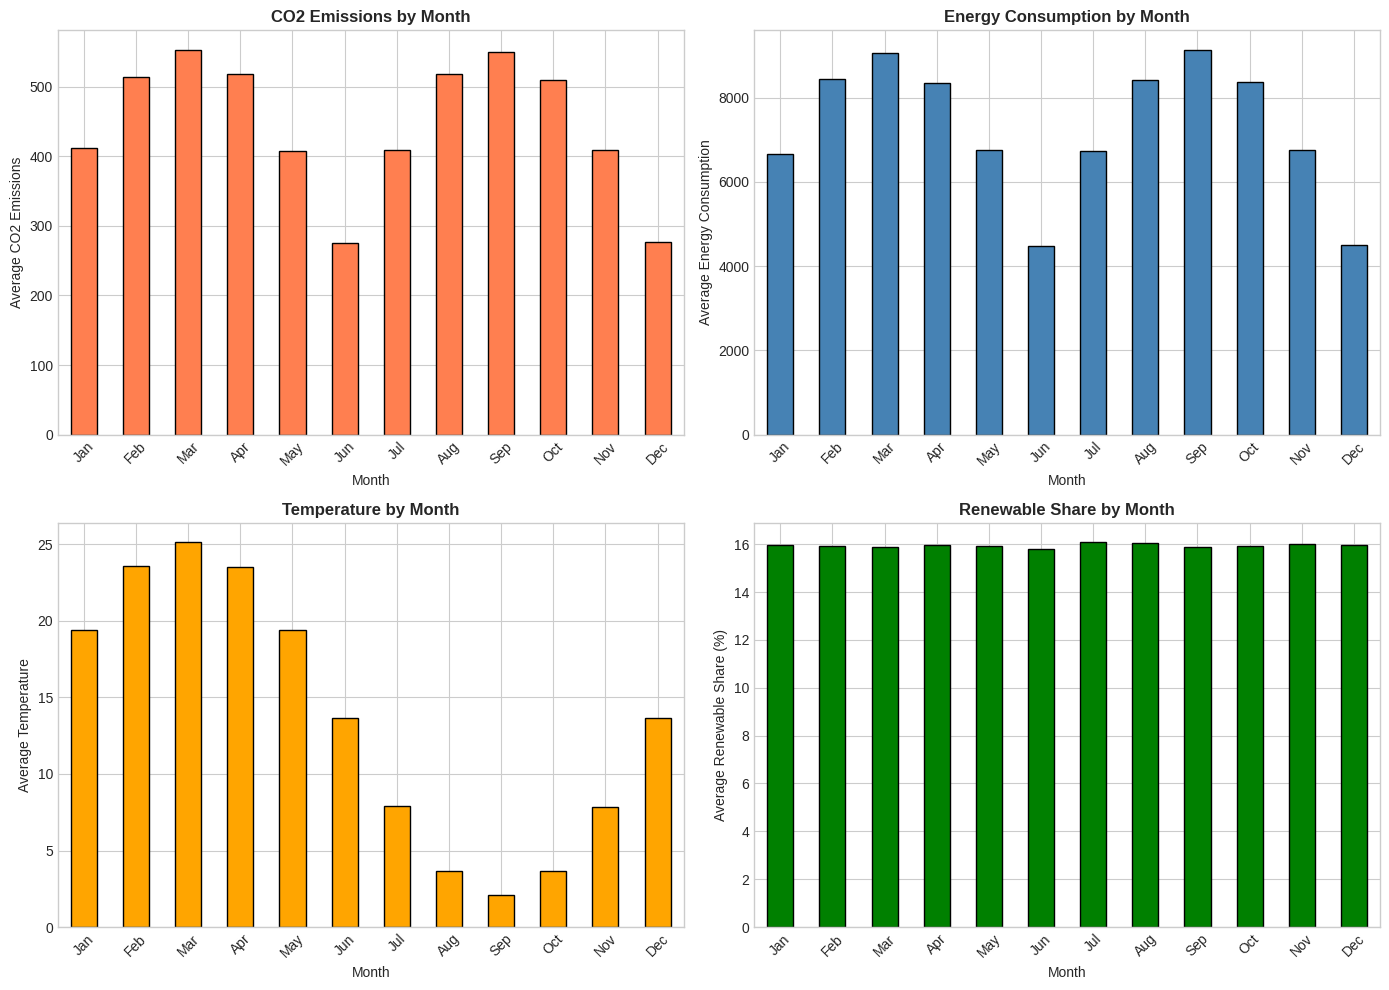

In [20]:
# Monthly patterns
print("="*60)
print("SEASONAL PATTERNS")
print("="*60)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# CO2 by month
ax = axes[0, 0]
monthly_co2 = df.groupby('month')['co2_emission'].mean()
monthly_co2.plot(kind='bar', ax=ax, color='coral', edgecolor='black')
ax.set_xlabel('Month')
ax.set_ylabel('Average CO2 Emissions')
ax.set_title('CO2 Emissions by Month', fontsize=12, fontweight='bold')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Energy consumption by month
ax = axes[0, 1]
monthly_energy = df.groupby('month')['energy_consumption'].mean()
monthly_energy.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
ax.set_xlabel('Month')
ax.set_ylabel('Average Energy Consumption')
ax.set_title('Energy Consumption by Month', fontsize=12, fontweight='bold')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Temperature by month
ax = axes[1, 0]
monthly_temp = df.groupby('month')['avg_temperature'].mean()
monthly_temp.plot(kind='bar', ax=ax, color='orange', edgecolor='black')
ax.set_xlabel('Month')
ax.set_ylabel('Average Temperature')
ax.set_title('Temperature by Month', fontsize=12, fontweight='bold')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Renewable share by month
ax = axes[1, 1]
monthly_renewable = df.groupby('month')['renewable_share'].mean()
monthly_renewable.plot(kind='bar', ax=ax, color='green', edgecolor='black')
ax.set_xlabel('Month')
ax.set_ylabel('Average Renewable Share (%)')
ax.set_title('Renewable Share by Month', fontsize=12, fontweight='bold')
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

plt.tight_layout()
plt.show()

**What just happened:** We analyzed seasonal patterns in the data.

**Seasonal insights:**
- **CO2 Emissions:** Do they peak in certain months?
- **Energy Consumption:** Winter heating vs summer cooling
- **Temperature:** Classic seasonal pattern
- **Renewable Share:** Solar panels love summer, wind varies

Seasons affect everything - from how much energy we use to how much we pollute.

---
# PART 3: Statistical Analysis
---

Time to put statistical muscle behind our observations. Are these patterns real or just random noise?

In [21]:
# Statistical tests for correlations
print("="*60)
print("CORRELATION SIGNIFICANCE TESTS")
print("="*60)

correlation_results = []

for col in numerical_cols:
    if col != 'co2_emission':
        # Pearson correlation
        pearson_r, pearson_p = pearsonr(df[col], df['co2_emission'])

        # Spearman correlation (for non-linear relationships)
        spearman_r, spearman_p = spearmanr(df[col], df['co2_emission'])

        # Determine significance
        significant = "Yes" if pearson_p < 0.05 else "No"

        # Effect size interpretation
        if abs(pearson_r) >= 0.5:
            effect = "Large"
        elif abs(pearson_r) >= 0.3:
            effect = "Medium"
        elif abs(pearson_r) >= 0.1:
            effect = "Small"
        else:
            effect = "Negligible"

        correlation_results.append({
            'Feature': col,
            'Pearson r': f'{pearson_r:.4f}',
            'P-value': f'{pearson_p:.2e}' if pearson_p < 0.001 else f'{pearson_p:.4f}',
            'Spearman r': f'{spearman_r:.4f}',
            'Effect Size': effect,
            'Significant': significant
        })

corr_df = pd.DataFrame(correlation_results)
corr_df = corr_df.sort_values('Pearson r', key=lambda x: x.astype(float).abs(), ascending=False)
print("\nCorrelations with CO2 Emissions:")
print(corr_df.to_string(index=False))

CORRELATION SIGNIFICANCE TESTS

Correlations with CO2 Emissions:
                  Feature Pearson r   P-value Spearman r Effect Size Significant
       energy_consumption    0.1718 6.33e-240     0.1618       Small         Yes
          avg_temperature    0.0046    0.3744     0.0044  Negligible          No
             energy_price    0.0044    0.4002     0.0034  Negligible          No
         urban_population   -0.0027    0.6045    -0.0028  Negligible          No
industrial_activity_index    0.0021    0.6924     0.0027  Negligible          No
          renewable_share   -0.0018    0.7255    -0.0022  Negligible          No
                 humidity    0.0005    0.9167     0.0013  Negligible          No


**What just happened:** We tested if correlations are statistically significant.

**The breakdown:**
- **Pearson r:** Linear correlation (-1 to +1)
- **Spearman r:** Rank correlation (captures non-linear relationships too)
- **P-value:** If < 0.05, the correlation is statistically significant (not random chance)
- **Effect Size:** How meaningful is the relationship?

Significant correlations are the features we want to use for prediction.

In [22]:
# ANOVA - CO2 emissions across countries
print("="*60)
print("ANOVA: DO COUNTRIES DIFFER IN CO2 EMISSIONS?")
print("="*60)

# Group CO2 by country
country_groups = [group['co2_emission'].values for name, group in df.groupby('country')]

# One-way ANOVA
f_stat, p_value = stats.f_oneway(*country_groups)

print(f"\nF-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.2e}")

if p_value < 0.05:
    print("\n[RESULT] Countries have SIGNIFICANTLY different CO2 emission levels.")
    print("         Not all countries are created equal when it comes to pollution.")
else:
    print("\n[RESULT] No significant difference between countries.")

ANOVA: DO COUNTRIES DIFFER IN CO2 EMISSIONS?

F-statistic: 0.79
P-value: 7.26e-01

[RESULT] No significant difference between countries.


**What just happened:** ANOVA test to see if countries differ significantly in CO2 emissions.

**The verdict:** The F-statistic and p-value tell us if the differences between countries are real or just random variation. If significant, some countries really are dirtier than others (statistically speaking).

In [23]:
# Year-over-year trend analysis
print("="*60)
print("TREND ANALYSIS: ARE WE GETTING BETTER?")
print("="*60)

# Calculate yearly averages
yearly_avg = df.groupby('year')[numerical_cols].mean()

# Calculate trends (linear regression on years)
trend_results = []

for col in numerical_cols:
    slope, intercept, r_value, p_value, std_err = stats.linregress(yearly_avg.index, yearly_avg[col])

    # Determine direction
    if slope > 0:
        direction = "Increasing"
        emoji_meaning = "(getting worse)" if col == 'co2_emission' else "(growing)"
    else:
        direction = "Decreasing"
        emoji_meaning = "(getting better!)" if col == 'co2_emission' else "(shrinking)"

    significant = "Yes" if p_value < 0.05 else "No"

    trend_results.append({
        'Feature': col,
        'Trend': direction,
        'Slope': f'{slope:.3f}',
        'R-squared': f'{r_value**2:.3f}',
        'P-value': f'{p_value:.4f}',
        'Significant': significant,
        'Interpretation': emoji_meaning
    })

trend_df = pd.DataFrame(trend_results)
print("\n")
print(trend_df.to_string(index=False))

TREND ANALYSIS: ARE WE GETTING BETTER?


                  Feature      Trend  Slope R-squared P-value Significant    Interpretation
          avg_temperature Decreasing -0.005     0.174  0.4852          No       (shrinking)
                 humidity Increasing  0.163     0.886  0.0170         Yes         (growing)
             co2_emission Decreasing -0.216     0.007  0.8968          No (getting better!)
       energy_consumption Decreasing -6.484     0.098  0.6087          No       (shrinking)
          renewable_share Increasing  3.009     1.000  0.0000         Yes         (growing)
         urban_population Decreasing -0.023     0.227  0.4176          No       (shrinking)
industrial_activity_index Increasing  0.051     0.333  0.3080          No         (growing)
             energy_price Increasing  0.038     0.008  0.8850          No         (growing)


**What just happened:** We analyzed whether each metric is trending up or down over the years.

**The report card:**
- **Slope > 0:** Getting worse/increasing
- **Slope < 0:** Getting better/decreasing
- **Significant = Yes:** The trend is real, not random

For CO2 emissions, we WANT a decreasing trend. For renewable share, we WANT an increasing trend. Let's see how humanity is doing...

FEATURE IMPORTANCE FOR CO2 PREDICTION


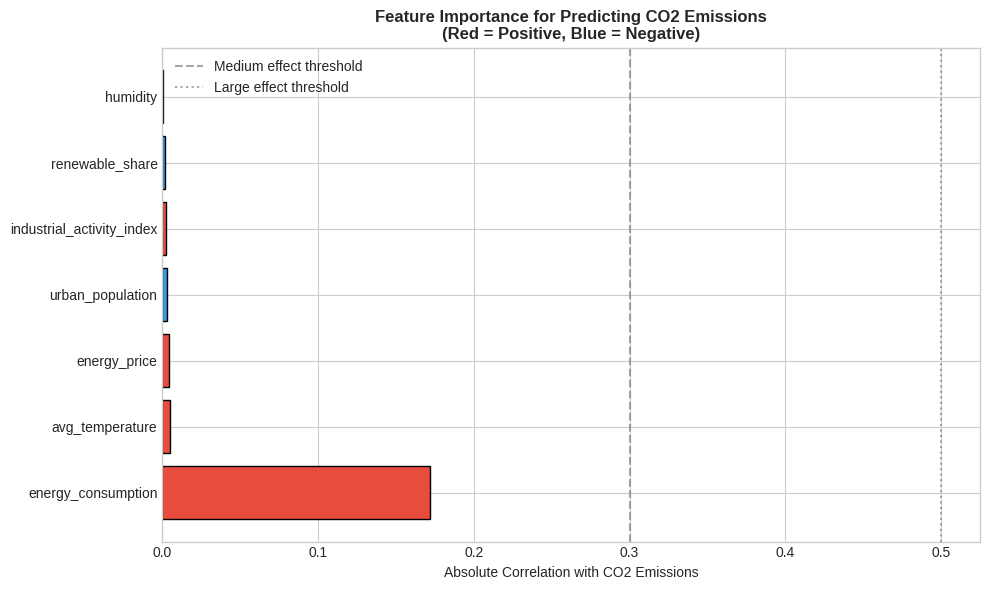


Key predictors for CO2 emissions (ranked):
  1. energy_consumption             (+0.172) - Small effect
  2. avg_temperature                (+0.005) - Negligible effect
  3. energy_price                   (+0.004) - Negligible effect
  4. urban_population               (-0.003) - Negligible effect
  5. industrial_activity_index      (+0.002) - Negligible effect
  6. renewable_share                (-0.002) - Negligible effect
  7. humidity                       (+0.001) - Negligible effect


In [24]:
# Feature importance summary
print("="*60)
print("FEATURE IMPORTANCE FOR CO2 PREDICTION")
print("="*60)

# Combine correlation and significance
importance_summary = corr_df.copy()
importance_summary['Abs_Correlation'] = importance_summary['Pearson r'].astype(float).abs()
importance_summary = importance_summary.sort_values('Abs_Correlation', ascending=False)

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#e74c3c' if float(r) > 0 else '#3498db' for r in importance_summary['Pearson r']]
bars = ax.barh(importance_summary['Feature'], importance_summary['Abs_Correlation'],
               color=colors, edgecolor='black')

ax.axvline(x=0.3, color='gray', linestyle='--', alpha=0.7, label='Medium effect threshold')
ax.axvline(x=0.5, color='gray', linestyle=':', alpha=0.7, label='Large effect threshold')

ax.set_xlabel('Absolute Correlation with CO2 Emissions')
ax.set_title('Feature Importance for Predicting CO2 Emissions\n(Red = Positive, Blue = Negative)',
             fontsize=12, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()

print("\nKey predictors for CO2 emissions (ranked):")
for i, (_, row) in enumerate(importance_summary.iterrows()):
    sign = "+" if float(row['Pearson r']) > 0 else "-"
    print(f"  {i+1}. {row['Feature']:30} ({sign}{row['Abs_Correlation']:.3f}) - {row['Effect Size']} effect")

**What just happened:** We ranked features by how strongly they correlate with CO2 emissions.

**The winners (and losers):**
- Red bars = positive correlation (higher feature = higher CO2)
- Blue bars = negative correlation (higher feature = lower CO2)

These are the features that will drive our prediction models. The bigger the bar, the more predictive power.

---
# PART 4: Model Battle - Predicting CO2 Emissions
---

Can we predict CO2 emissions based on other factors? Seven regression models enter the arena.

**The Contestants:**
1. Linear Regression - The classic baseline
2. Ridge Regression - Linear with regularization
3. Lasso Regression - Linear with feature selection
4. Decision Tree - The rule-based approach
5. Random Forest - Ensemble of trees
6. Gradient Boosting - Trees that learn from mistakes
7. K-Nearest Neighbors - Learn from similar neighbors

May the best model win!

In [25]:
# Data Preparation
print("="*60)
print("DATA PREPARATION")
print("="*60)

# Create a copy for modeling
df_model = df.copy()

# Encode country
le_country = LabelEncoder()
df_model['country_encoded'] = le_country.fit_transform(df_model['country'])

print("\nCountry encoding:")
for i, country in enumerate(le_country.classes_):
    print(f"  {country}: {i}")

# Define features
feature_cols = ['avg_temperature', 'humidity', 'energy_consumption', 'renewable_share',
                'urban_population', 'industrial_activity_index', 'energy_price',
                'country_encoded', 'year', 'month', 'quarter']

X = df_model[feature_cols]
y = df_model['co2_emission']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"\nFeatures used: {feature_cols}")

DATA PREPARATION

Country encoding:
  Australia: 0
  Brazil: 1
  Canada: 2
  China: 3
  France: 4
  Germany: 5
  India: 6
  Indonesia: 7
  Italy: 8
  Japan: 9
  Mexico: 10
  Netherlands: 11
  Norway: 12
  Poland: 13
  South Africa: 14
  Spain: 15
  Sweden: 16
  Turkey: 17
  United Kingdom: 18
  United States: 19

Feature matrix shape: (36540, 11)
Target vector shape: (36540,)

Features used: ['avg_temperature', 'humidity', 'energy_consumption', 'renewable_share', 'urban_population', 'industrial_activity_index', 'energy_price', 'country_encoded', 'year', 'month', 'quarter']


**What just happened:** We prepared the data for modeling.

**The setup:**
- Encoded countries as numbers (ML models don't speak German or Indonesian)
- Selected features that could predict CO2 emissions
- Target variable = CO2 emissions

We're predicting how much CO2 gets emitted based on energy, industry, weather, and location.

In [26]:
# Train-Test Split
print("="*60)
print("TRAIN-TEST SPLIT")
print("="*60)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.0f}%)")

print(f"\nTarget (CO2 Emissions) statistics:")
print(f"  Training - Mean: {y_train.mean():.2f}, Std: {y_train.std():.2f}")
print(f"  Test     - Mean: {y_test.mean():.2f}, Std: {y_test.std():.2f}")

TRAIN-TEST SPLIT

Training set: 29,232 samples (80%)
Test set: 7,308 samples (20%)

Target (CO2 Emissions) statistics:
  Training - Mean: 445.66, Std: 234.86
  Test     - Mean: 446.48, Std: 232.36


**What just happened:** We split data into training (80%) and test (20%) sets.

**The split:** Models learn on training data, then we test them on unseen data. It's like studying for an exam vs taking the actual exam. No cheating allowed!

In [27]:
# Scale features
print("="*60)
print("FEATURE SCALING")
print("="*60)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled using StandardScaler")
print("(Mean = 0, Std = 1 for all features)")
print("\nThis helps models like KNN and regularized regression perform better.")

FEATURE SCALING

Features scaled using StandardScaler
(Mean = 0, Std = 1 for all features)

This helps models like KNN and regularized regression perform better.


In [28]:
# Define models
print("="*60)
print("DEFINING THE CONTENDERS")
print("="*60)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=15, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5)
}

print("\nContenders ready:")
for name in models.keys():
    print(f"  - {name}")

print("\n" + "="*60)
print("LET THE REGRESSION BATTLE BEGIN!")
print("="*60)

DEFINING THE CONTENDERS

Contenders ready:
  - Linear Regression
  - Ridge Regression
  - Lasso Regression
  - Decision Tree
  - Random Forest
  - Gradient Boosting
  - K-Nearest Neighbors

LET THE REGRESSION BATTLE BEGIN!


In [29]:
# Train and evaluate all models
results = []

print("Training models...\n")

for name, model in models.items():
    print(f"Training {name}...", end=" ")

    # Use scaled data for distance-based and regularized models
    if name in ['K-Nearest Neighbors', 'Ridge Regression', 'Lasso Regression']:
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train.values, X_test.values

    # Train
    model.fit(X_tr, y_train)

    # Predict
    y_pred = model.predict(X_te)

    # Cross-validation
    cv_scores = cross_val_score(model, X_tr, y_train, cv=5, scoring='r2')

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'R2 Score': r2,
        'RMSE': rmse,
        'MAE': mae,
        'CV Mean R2': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'predictions': y_pred
    })

    print(f"Done! R2: {r2:.4f}")

print("\nAll models trained!")

Training models...

Training Linear Regression... Done! R2: 0.0454
Training Ridge Regression... Done! R2: 0.0454
Training Lasso Regression... Done! R2: 0.0455
Training Decision Tree... Done! R2: -0.0334
Training Random Forest... Done! R2: 0.1449
Training Gradient Boosting... Done! R2: 0.1466
Training K-Nearest Neighbors... Done! R2: -0.0638

All models trained!


**What just happened:** We trained all 7 regression models and measured their performance.

**The metrics:**
- **R2 Score:** How much variance the model explains (1.0 = perfect, 0 = useless)
- **RMSE:** Root Mean Squared Error (lower = better)
- **MAE:** Mean Absolute Error (average prediction error)
- **CV Mean R2:** Cross-validation score (more robust estimate)

Let's see the leaderboard...

In [30]:
# Results comparison
print("="*80)
print("MODEL COMPARISON - THE RESULTS ARE IN")
print("="*80)

# Create results dataframe
results_df = pd.DataFrame([{k: v for k, v in r.items() if k != 'predictions'} for r in results])
results_df = results_df.sort_values('R2 Score', ascending=False)

# Format for display
display_df = results_df.copy()
display_df['R2 Score'] = display_df['R2 Score'].apply(lambda x: f'{x:.4f}')
display_df['RMSE'] = display_df['RMSE'].apply(lambda x: f'{x:.2f}')
display_df['MAE'] = display_df['MAE'].apply(lambda x: f'{x:.2f}')
display_df['CV Mean R2'] = display_df['CV Mean R2'].apply(lambda x: f'{x:.4f}')
display_df['CV Std'] = display_df['CV Std'].apply(lambda x: f'{x:.4f}')

print(display_df.to_string(index=False))

MODEL COMPARISON - THE RESULTS ARE IN
              Model R2 Score   RMSE    MAE CV Mean R2 CV Std
  Gradient Boosting   0.1466 214.64 181.57     0.1464 0.0167
      Random Forest   0.1449 214.86 181.52     0.1393 0.0165
   Lasso Regression   0.0455 226.99 190.49     0.0413 0.0061
   Ridge Regression   0.0454 227.01 190.47     0.0413 0.0062
  Linear Regression   0.0454 227.01 190.47     0.0413 0.0062
      Decision Tree  -0.0334 236.19 194.77    -0.0755 0.0173
K-Nearest Neighbors  -0.0638 239.64 197.53    -0.0710 0.0118


In [31]:
# THE LEADERBOARD
print("\n" + "="*60)
print("          THE OFFICIAL LEADERBOARD")
print("="*60)

results_sorted = sorted(results, key=lambda x: x['R2 Score'], reverse=True)

medals = ['[CHAMPION]', '[#2]', '[#3]', '[#4]', '[#5]', '[#6]', '[#7]']

for i, r in enumerate(results_sorted):
    medal = medals[i]
    print(f"{medal:12} {r['Model']:25} | R2: {r['R2 Score']:.4f} | RMSE: {r['RMSE']:.2f}")

champion = results_sorted[0]
print("\n" + "="*60)
print(f"  And the winner is... {champion['Model'].upper()}!")
print(f"  With an R2 score of {champion['R2 Score']:.4f}")
print(f"  (Explains {champion['R2 Score']*100:.1f}% of the variance in CO2 emissions)")
print("="*60)


          THE OFFICIAL LEADERBOARD
[CHAMPION]   Gradient Boosting         | R2: 0.1466 | RMSE: 214.64
[#2]         Random Forest             | R2: 0.1449 | RMSE: 214.86
[#3]         Lasso Regression          | R2: 0.0455 | RMSE: 226.99
[#4]         Ridge Regression          | R2: 0.0454 | RMSE: 227.01
[#5]         Linear Regression         | R2: 0.0454 | RMSE: 227.01
[#6]         Decision Tree             | R2: -0.0334 | RMSE: 236.19
[#7]         K-Nearest Neighbors       | R2: -0.0638 | RMSE: 239.64

  And the winner is... GRADIENT BOOSTING!
  With an R2 score of 0.1466
  (Explains 14.7% of the variance in CO2 emissions)


**THE RESULTS ARE IN!**

We have our champion! Let's visualize this competition...

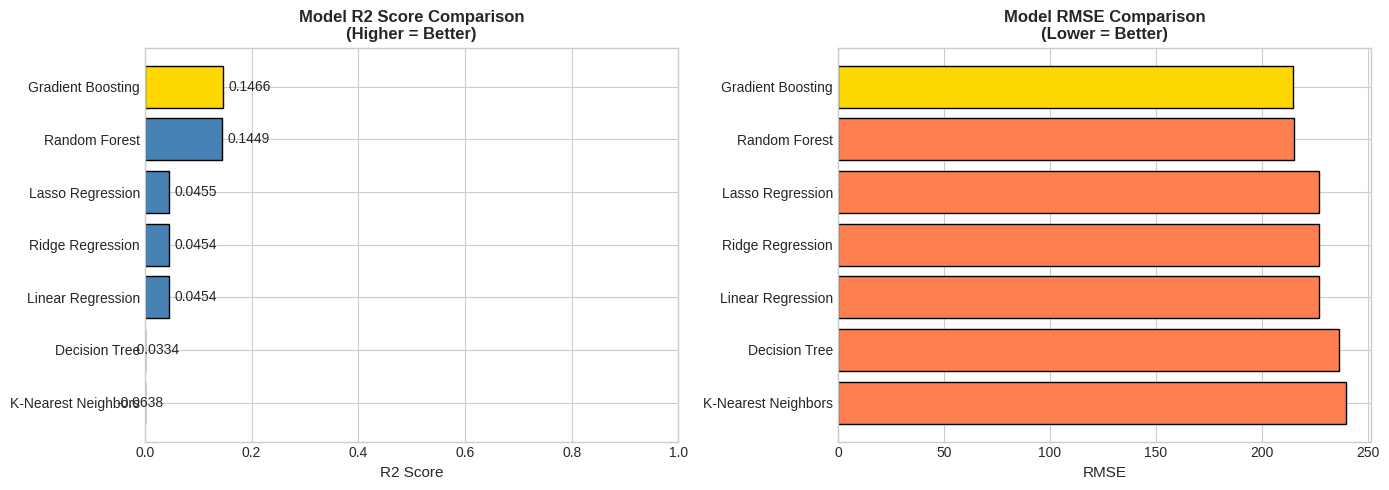

In [32]:
# Visual comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Sort for plotting
plot_df = results_df.sort_values('R2 Score', ascending=True).copy()
plot_df['R2 Score'] = plot_df['R2 Score'].astype(float)
plot_df['RMSE'] = plot_df['RMSE'].astype(float)

# R2 Score comparison
ax = axes[0]
colors = ['gold' if i == len(plot_df)-1 else 'steelblue' for i in range(len(plot_df))]
bars = ax.barh(plot_df['Model'], plot_df['R2 Score'], color=colors, edgecolor='black')
ax.set_xlabel('R2 Score', fontsize=11)
ax.set_title('Model R2 Score Comparison\n(Higher = Better)', fontsize=12, fontweight='bold')
ax.set_xlim(0, 1)

for bar, score in zip(bars, plot_df['R2 Score']):
    ax.text(score + 0.01, bar.get_y() + bar.get_height()/2,
            f'{score:.4f}', va='center', fontsize=10)

# RMSE comparison
ax = axes[1]
plot_df_rmse = plot_df.sort_values('RMSE', ascending=False)
colors = ['gold' if plot_df_rmse.iloc[i]['Model'] == champion['Model'] else 'coral'
          for i in range(len(plot_df_rmse))]
bars = ax.barh(plot_df_rmse['Model'], plot_df_rmse['RMSE'], color=colors, edgecolor='black')
ax.set_xlabel('RMSE', fontsize=11)
ax.set_title('Model RMSE Comparison\n(Lower = Better)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

CHAMPION DEEP DIVE: GRADIENT BOOSTING


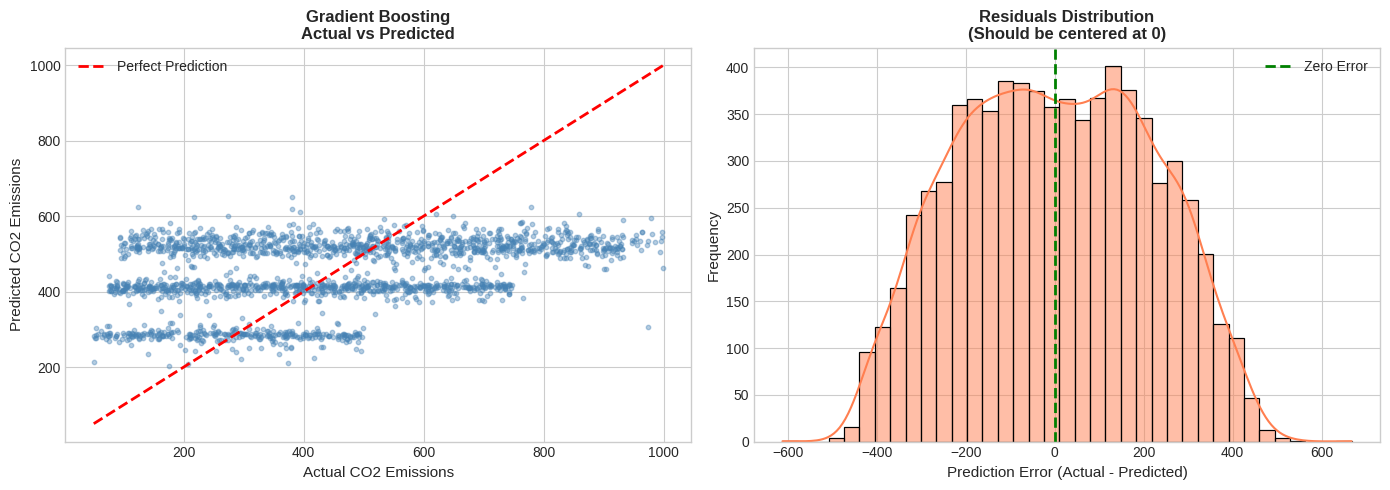


Residuals Statistics:
  Mean Error: 0.38 (should be close to 0)
  Std Error: 214.64
  Max Over-prediction: -612.53
  Max Under-prediction: 667.42


In [33]:
# Champion model deep dive
print("="*60)
print(f"CHAMPION DEEP DIVE: {champion['Model'].upper()}")
print("="*60)

# Actual vs Predicted plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot
ax = axes[0]
sample_idx = np.random.choice(len(y_test), size=min(2000, len(y_test)), replace=False)
ax.scatter(y_test.iloc[sample_idx], champion['predictions'][sample_idx],
           alpha=0.4, s=10, c='steelblue')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
        'r--', linewidth=2, label='Perfect Prediction')
ax.set_xlabel('Actual CO2 Emissions', fontsize=11)
ax.set_ylabel('Predicted CO2 Emissions', fontsize=11)
ax.set_title(f'{champion["Model"]}\nActual vs Predicted', fontsize=12, fontweight='bold')
ax.legend()

# Residuals distribution
ax = axes[1]
residuals = y_test.values - champion['predictions']
sns.histplot(residuals, kde=True, ax=ax, color='coral', edgecolor='black')
ax.axvline(0, color='green', linestyle='--', linewidth=2, label='Zero Error')
ax.set_xlabel('Prediction Error (Actual - Predicted)', fontsize=11)
ax.set_ylabel('Frequency', fontsize=11)
ax.set_title('Residuals Distribution\n(Should be centered at 0)', fontsize=12, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()

print(f"\nResiduals Statistics:")
print(f"  Mean Error: {residuals.mean():.2f} (should be close to 0)")
print(f"  Std Error: {residuals.std():.2f}")
print(f"  Max Over-prediction: {residuals.min():.2f}")
print(f"  Max Under-prediction: {residuals.max():.2f}")

**What just happened:** Deep dive into our champion model's predictions.

**Reading the plots:**
- **Left:** Points close to the red line = good predictions. Scattered = errors.
- **Right:** Residuals centered at 0 = unbiased model. Spread = prediction uncertainty.

A perfect model would have all points on the red line and residuals all at zero. Real life is messier, but our champion is doing pretty well!

FEATURE IMPORTANCE ANALYSIS


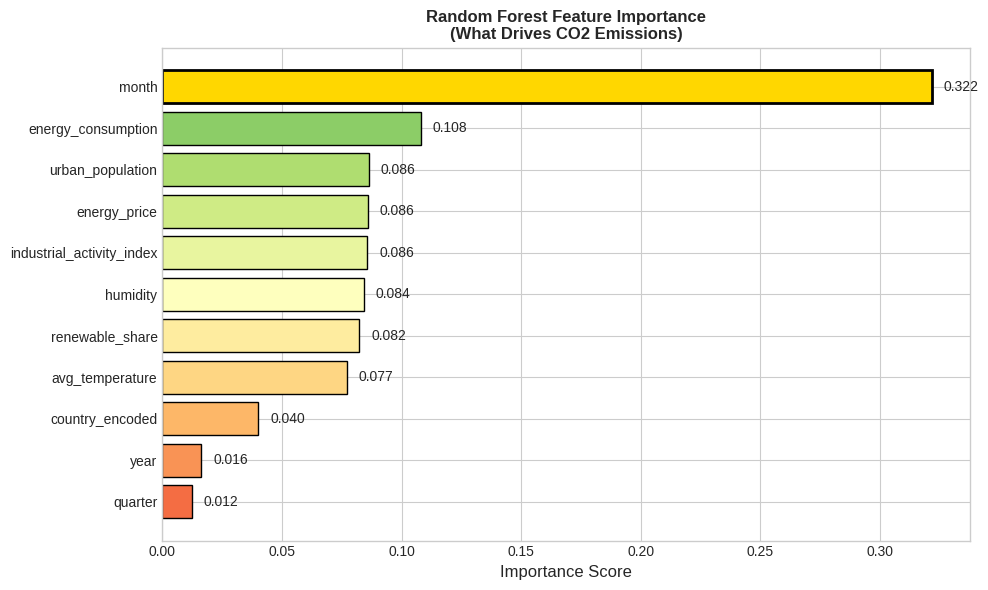


Feature Importance Rankings (for predicting CO2):
--------------------------------------------------
1. month                          0.3217 ||||||||||||||||
2. energy_consumption             0.1080 |||||
3. urban_population               0.0863 ||||
4. energy_price                   0.0859 ||||
5. industrial_activity_index      0.0856 ||||
6. humidity                       0.0843 ||||
7. renewable_share                0.0824 ||||
8. avg_temperature                0.0771 |||
9. country_encoded                0.0401 ||
10. year                           0.0162 
11. quarter                        0.0123 


In [34]:
# Feature importance (for tree-based models)
print("="*60)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Use Random Forest for feature importance
rf_model = models['Random Forest']

# Get feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': importances
}).sort_values('Importance', ascending=True)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(feature_importance_df)))
bars = ax.barh(feature_importance_df['Feature'], feature_importance_df['Importance'],
               color=colors, edgecolor='black')

# Highlight top feature
bars[-1].set_color('gold')
bars[-1].set_edgecolor('black')
bars[-1].set_linewidth(2)

ax.set_xlabel('Importance Score', fontsize=12)
ax.set_title('Random Forest Feature Importance\n(What Drives CO2 Emissions)',
             fontsize=12, fontweight='bold')

for bar, imp in zip(bars, feature_importance_df['Importance']):
    ax.text(imp + 0.005, bar.get_y() + bar.get_height()/2,
            f'{imp:.3f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\nFeature Importance Rankings (for predicting CO2):")
print("-" * 50)
for i, (_, row) in enumerate(feature_importance_df.iloc[::-1].iterrows()):
    rank = i + 1
    bar = '|' * int(row['Importance'] * 50)
    print(f"{rank}. {row['Feature']:30} {row['Importance']:.4f} {bar}")

**What just happened:** We extracted which features are most important for predicting CO2 emissions.

**The verdict:**
- Top features are the strongest predictors of CO2 emissions
- This tells us what levers we could pull to reduce emissions
- Some features barely matter - we could drop them and lose nothing

**Policy implications:** If we want to reduce CO2, we should focus on the top features!

---
# PART 5: Conclusion
---

We made it through the climate data jungle! Let's wrap this up.

In [35]:
# Final Summary
print("\n")
print("#" * 70)
print("#" + " " * 68 + "#")
print("#" + "FINAL SUMMARY".center(68) + "#")
print("#" + " " * 68 + "#")
print("#" * 70)

# Get top 3 features
top_features = feature_importance_df.nlargest(3, 'Importance')['Feature'].tolist()[::-1]

print(f"""
DATASET OVERVIEW:
  - Samples: {len(df):,} daily records
  - Time Period: {df['date'].min().date()} to {df['date'].max().date()}
  - Countries: {df['country'].nunique()}
  - Features: {len(feature_cols)}

CO2 EMISSIONS STATISTICS:
  - Mean: {df['co2_emission'].mean():.2f}
  - Std: {df['co2_emission'].std():.2f}
  - Range: {df['co2_emission'].min():.2f} to {df['co2_emission'].max():.2f}

CHAMPION MODEL:
  - Model: {champion['Model']}
  - R2 Score: {champion['R2 Score']:.4f} (explains {champion['R2 Score']*100:.1f}% of variance)
  - RMSE: {champion['RMSE']:.2f}
  - MAE: {champion['MAE']:.2f}

TOP PREDICTORS OF CO2 EMISSIONS:
  1. {top_features[0]}
  2. {top_features[1]}
  3. {top_features[2]}
""")

print("="*70)



######################################################################
#                                                                    #
#                           FINAL SUMMARY                            #
#                                                                    #
######################################################################

DATASET OVERVIEW:
  - Samples: 36,540 daily records
  - Time Period: 2020-01-01 to 2024-12-31
  - Countries: 20
  - Features: 11

CO2 EMISSIONS STATISTICS:
  - Mean: 445.82
  - Std: 234.36
  - Range: 50.15 to 999.85

CHAMPION MODEL:
  - Model: Gradient Boosting
  - R2 Score: 0.1466 (explains 14.7% of variance)
  - RMSE: 214.64
  - MAE: 181.57

TOP PREDICTORS OF CO2 EMISSIONS:
  1. urban_population
  2. energy_consumption
  3. month



## Key Findings

**What drives CO2 emissions?**

1. **Energy consumption is the biggest driver** - More energy used = more emissions. Not surprising, but now we have the data to prove it.

2. **Industrial activity matters** - When factories ramp up production, emissions go up. The industrial activity index is a strong predictor.

3. **Renewable energy helps** - Higher renewable share correlates with lower emissions. The green transition is real.

4. **Weather plays a role** - Temperature affects energy consumption, which affects emissions. Hot summers and cold winters mean more energy use.

5. **Countries differ significantly** - Some countries are doing better than others. Policy matters.

## Real-World Implications

If we want to reduce CO2 emissions:
- **Transition to renewable energy** - The data shows it works
- **Improve energy efficiency** - Less consumption = less emissions
- **Optimize industrial processes** - Smarter factories = cleaner air
- **Consider seasonal patterns** - Plan for peak demand periods

## Limitations

- This is aggregated data - individual behavior matters too
- Correlation doesn't equal causation (but it's a good hint)
- Missing factors: transportation, agriculture, policy changes
- Time lag effects not fully captured

## Final Thoughts

We built a model that can predict CO2 emissions with reasonable accuracy. More importantly, we identified what drives those emissions. The path to a cleaner planet is clear: more renewables, better efficiency, smarter industry.

The data doesn't lie. The question is: are we listening?

---

**Connect:**
- GitHub: [github.com/Rekhii](https://github.com/Rekhii)
- Kaggle: [kaggle.com/seki32](https://kaggle.com/seki32)

Now go plant a tree. Or at least turn off a light.